# Inductive Miner

## Step 1: Handling and import event data

In [13]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

log = xes_importer.apply("Hospital Billing - Event Log.xes")

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

## Step 2: Mining event log - Process Discovery

In [14]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

net, initial_marking, final_marking = inductive_miner.apply(log)

tree = inductive_miner.apply_tree(log)

## Step 3: Visualize Petri net and Process Tree of Mined Process from log

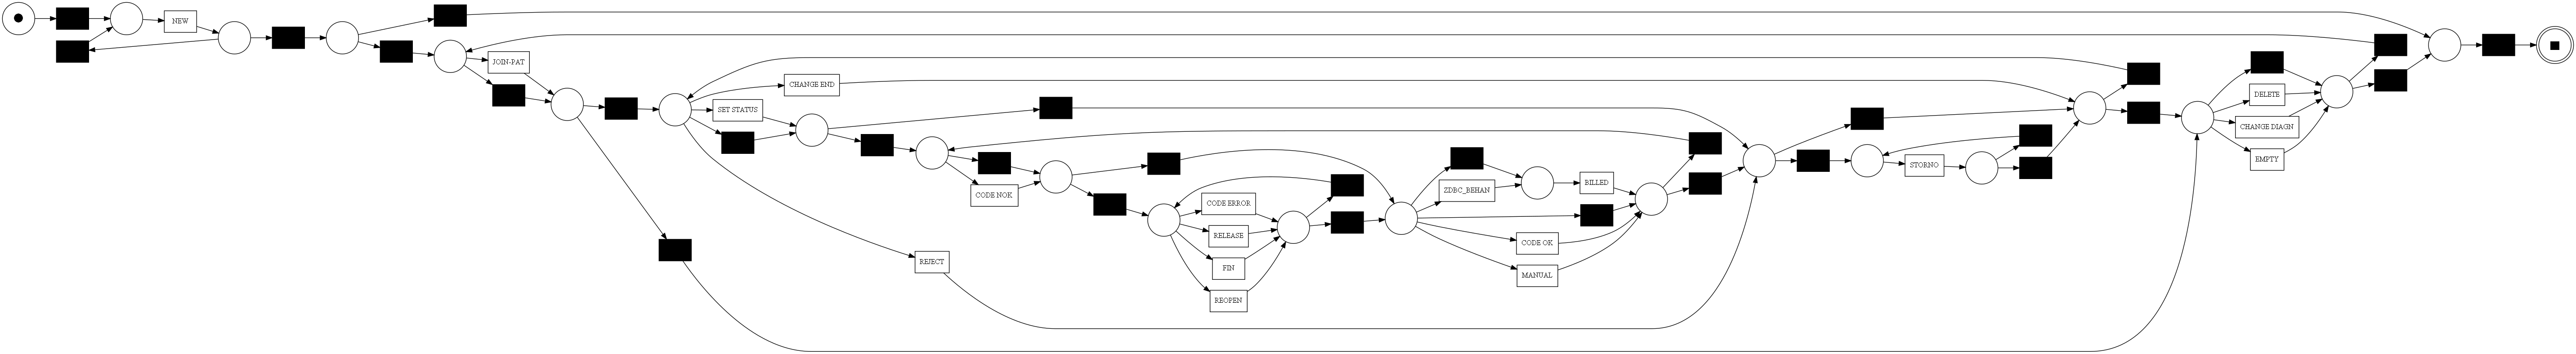

In [3]:
pm4py.view_petri_net(net, initial_marking, final_marking)

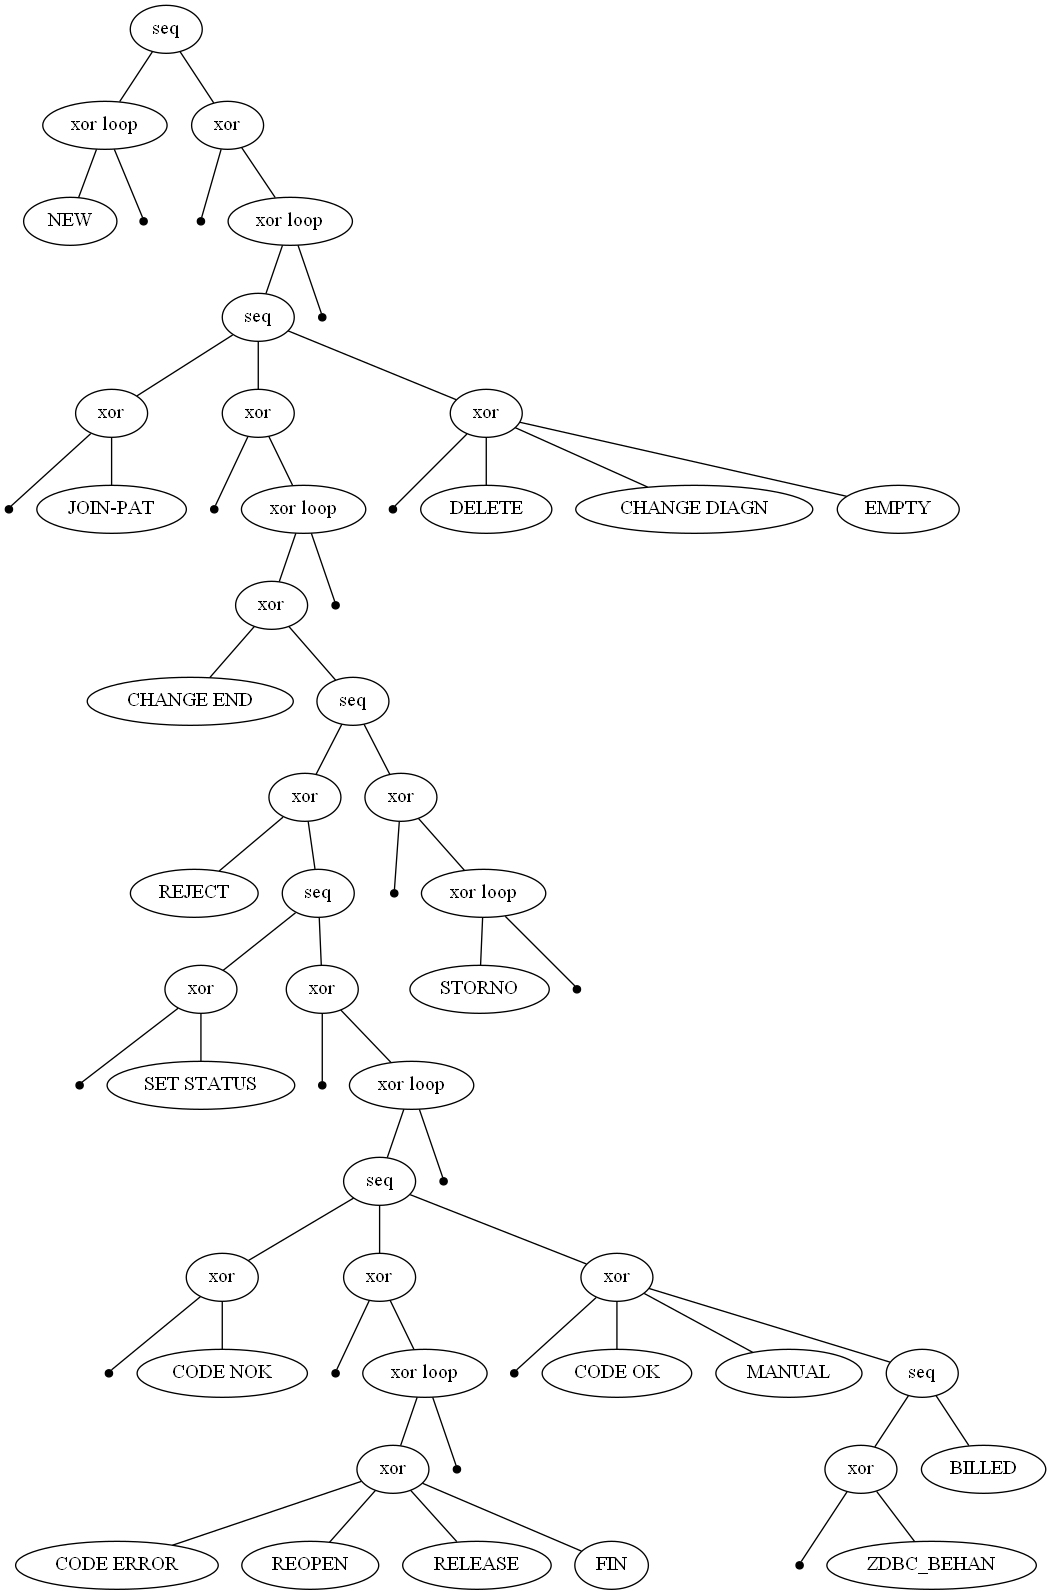

In [4]:
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Step 4: Convert Petri Net to BPMN

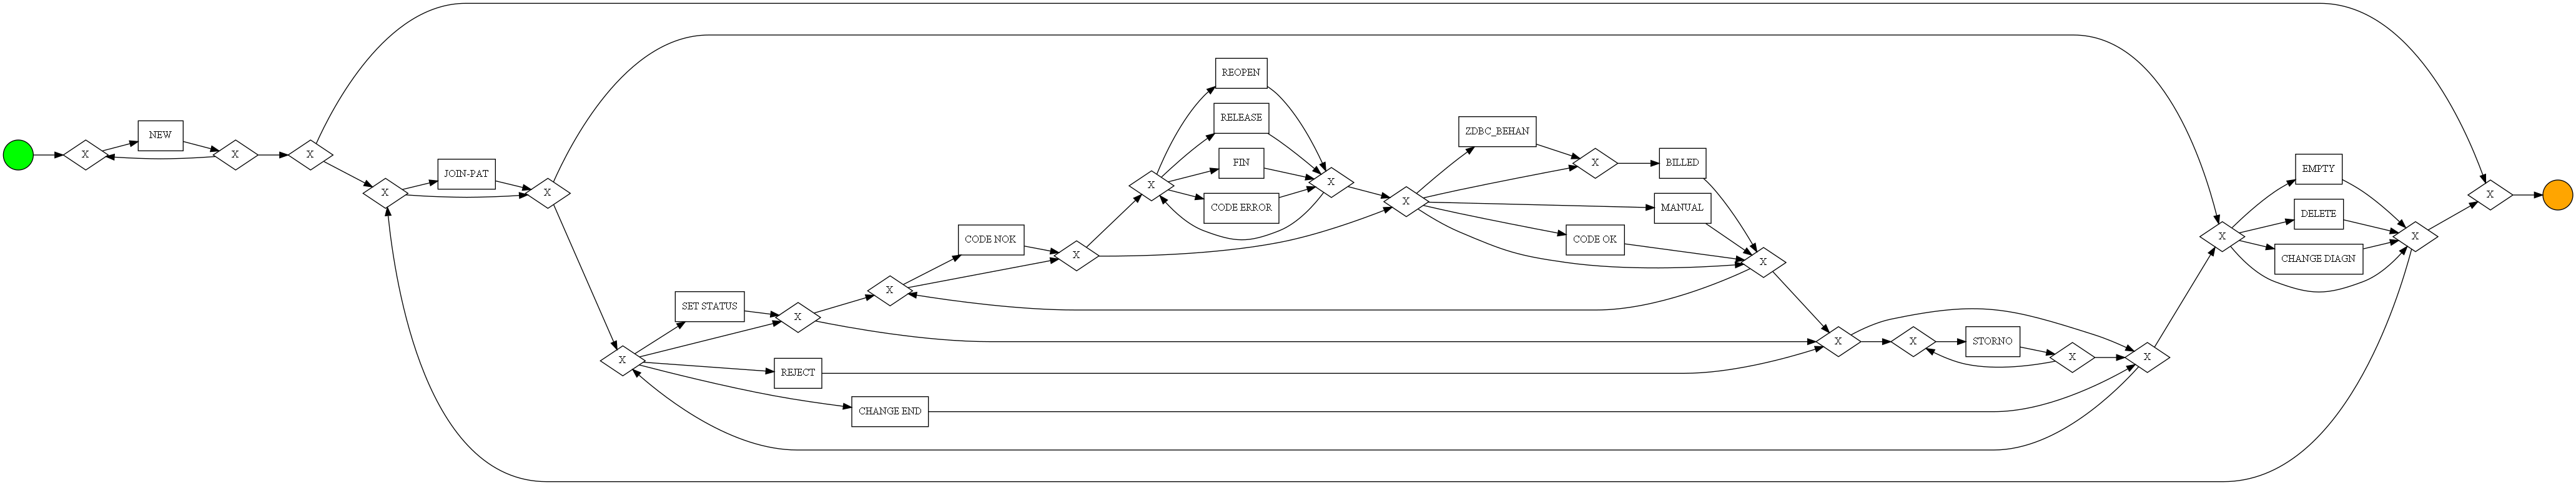

In [5]:
bpmn_graph = pm4py.convert_to_bpmn(*[net, initial_marking, final_marking])
pm4py.view_bpmn(bpmn_graph, "png")

## Step 5: Log-Model Evaluatio

### Replay Fitness

In [6]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/1020 [00:00<?, ?it/s]

In [7]:
fitness

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

### Precision

In [8]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/3109 [00:00<?, ?it/s]

In [9]:
prec

0.49957403881586526

### F-measure

In [10]:
def f_measure(f, p):
    return (2*f*p)/(f+p)

f_measure(fitness['average_trace_fitness'], prec)

0.6662879269507128

In [11]:
%reset -f

In [15]:
fps = pm4py.discovery.discover_footprints(log, *[net, initial_marking, final_marking])

In [16]:
fps

[{'dfg': Counter({('NEW', 'FIN'): 1,
           ('FIN', 'RELEASE'): 1,
           ('RELEASE', 'CODE OK'): 1,
           ('CODE OK', 'BILLED'): 1}),
  'sequence': {('CODE OK', 'BILLED'),
   ('FIN', 'RELEASE'),
   ('NEW', 'FIN'),
   ('RELEASE', 'CODE OK')},
  'parallel': set(),
  'activities': {'BILLED', 'CODE OK', 'FIN', 'NEW', 'RELEASE'},
  'start_activities': {'NEW'},
  'end_activities': {'BILLED'},
  'min_trace_length': 5,
  'trace': ('NEW', 'FIN', 'RELEASE', 'CODE OK', 'BILLED')},
 {'dfg': Counter({('NEW', 'DELETE'): 1}),
  'sequence': {('NEW', 'DELETE')},
  'parallel': set(),
  'activities': {'DELETE', 'NEW'},
  'start_activities': {'NEW'},
  'end_activities': {'DELETE'},
  'min_trace_length': 2,
  'trace': ('NEW', 'DELETE')},
 {'dfg': Counter({('NEW', 'FIN'): 1,
           ('FIN', 'RELEASE'): 2,
           ('RELEASE', 'CODE OK'): 2,
           ('CODE OK', 'REOPEN'): 1,
           ('REOPEN', 'CHANGE DIAGN'): 1,
           ('CHANGE DIAGN', 'FIN'): 1,
           ('CODE OK', 'BILLED')